### Plot methane

In [1]:
import numpy as np
exp = 'methane_n-decane'
comp1 = 'methane'
path_n0 = 'myData\\' + exp + '\\' + comp1 + '\\0.txt'
path_n1 = 'myData\\' + exp + '\\' + comp1 + '\\1.txt'
# path_n2 = 'myData\\' + exp + '\\' + comp1 + '\\2.txt'
# path_n3 = 'myData\\' + exp + '\\' + comp1 + '\\3.txt'
# path_n4 = 'myData\\' + exp + '\\' + comp1 + '\\4.txt'
path_n5 = 'myData\\' + exp + '\\' + comp1 + '\\5.txt'

n_data0 = np.loadtxt(path_n0)
methane = np.loadtxt(path_n1)
# n_data2 = np.loadtxt(path_n2)
# n_data3 = np.loadtxt(path_n3)
# n_data4 = np.loadtxt(path_n4)
methane = np.loadtxt(path_n5)

In [2]:
z = np.linspace(0,1e-8,200)

NameError: name 'n_data1' is not defined

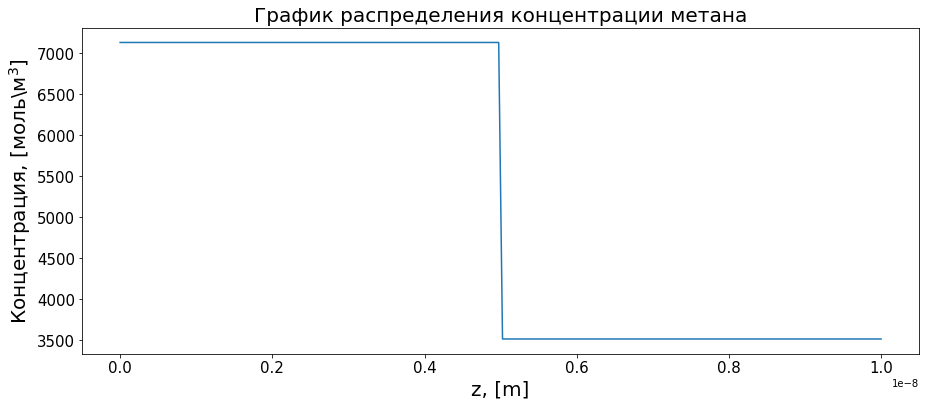

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 6))
plt.title('График распределения концентрации метана', size=20)
plt.plot(z, n_data0, label='t = 0 c')
plt.xlabel('z, [m]', size=20)
plt.ylabel('Концентрация, [моль\м$^{3}$]', size=20)
plt.tick_params(labelsize=15)
plt.plot(z,n_data1, label='t = 10$^{-9}$ c')
# plt.plot(n_data2)
# plt.plot(n_data3)
# plt.plot(n_data4)
# plt.plot(z,n_data5, label='t = 3*10$^{-11}$ c')
legend = plt.legend(fontsize=20)
legend.get_frame()
plt.savefig('METHANE.png', bbox_inches='tight')
plt.show()

### Plot n-decane

In [4]:
comp2 = 'n_decane'
path_n0 = 'myData\\' + exp + '\\' + comp2 + '\\0.txt'
path_n1 = 'myData\\' + exp + '\\' + comp2 + '\\1.txt'
# path_n2 = 'myData\\' + exp + '\\' + comp2 + '\\2.txt'
# path_n3 = 'myData\\' + exp + '\\' + comp2 + '\\3.txt'
# path_n4 = 'myData\\' + exp + '\\' + comp2 + '\\4.txt'
path_n5 = 'myData\\' + exp + '\\' + comp2 + '\\5.txt'

n_data0 = np.loadtxt(path_n0)
ndecane = np.loadtxt(path_n1)
# n_data2 = np.loadtxt(path_n2)
# n_data3 = np.loadtxt(path_n3)
# n_data4 = np.loadtxt(path_n4)
ndecane = np.loadtxt(path_n5)

NameError: name 'n_data1' is not defined

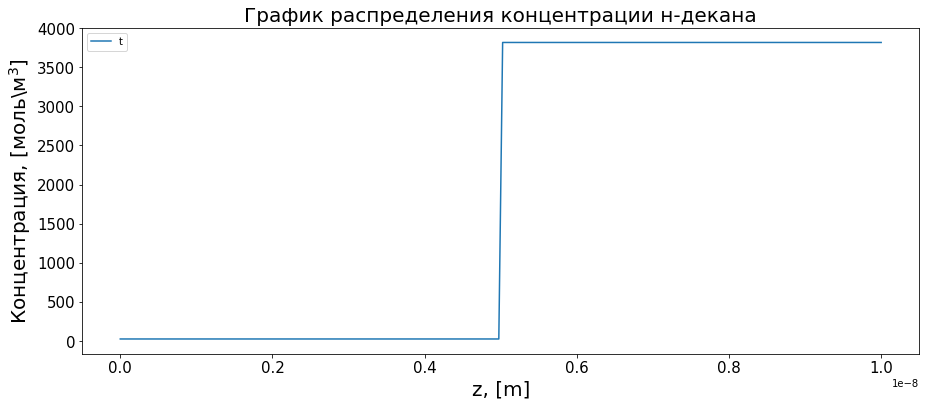

In [17]:
plt.figure(figsize=(15, 6))
plt.title('График распределения концентрации н-декана', size=20)
plt.plot(z,n_data0, label='t = 0 c')
plt.xlabel('z, [m]', fontsize=20)
plt.ylabel('Концентрация, [моль\м$^{3}$]', size=20)
plt.tick_params(labelsize=15)
plt.legend('t = 0 c')
plt.plot(z,n_data1, label=r't = 10$^{-9}$ c')
# plt.plot(n_data2)
# plt.plot(n_data3)
# plt.plot(n_data4)
# plt.plot(z,n_data5, label=r't = 3*10$^{-11}$ c')
legend = plt.legend(fontsize=20)
legend.get_frame()
plt.savefig('N-DECANE.png', bbox_inches='tight')
plt.show()

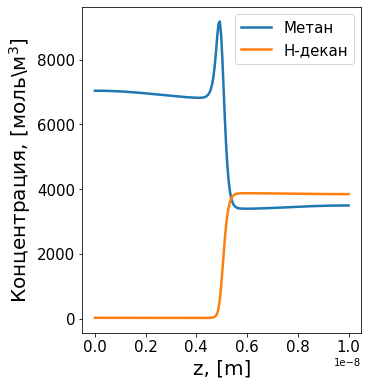

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 6))
# plt.title('График распределения концентрации', size=20)
plt.plot(z,methane, label='Метан', lw = 2.5)
plt.xlabel('z, [m]', fontsize=20)
plt.ylabel('Концентрация, [моль\м$^{3}$]', size=20)
plt.tick_params(labelsize=15)
plt.plot(z,ndecane, label='Н-декан', lw = 2.5)
legend = plt.legend(fontsize=15)
legend.get_frame()
plt.savefig('graph.png', bbox_inches='tight')
plt.show()

### Plot pressure

In [7]:
path_n1 = 'myData\\' + exp + '\\' + comp1 + '\\1.txt'
n_data1 = np.loadtxt(path_n1)
path_n2 = 'myData\\' + exp + '\\' + comp2 + '\\1.txt'
n_data2 = np.loadtxt(path_n2)
data = np.concatenate((n_data1, n_data2))
R = 8.31446261815324
from math import sqrt
M = 2
N = 200
T = 313.1
acentric_factor = [0.011, 0.484]
Tc = [190.55, 617.8]
Pc = [4.595e+6, 21.1e+5]
k_mix = [0.0, 0.1, 0.1, 0.0]

def alpha(acentric, Tr):
    return pow(1.0 + m_omega(acentric) * (1.0 - sqrt(Tr)), 2.0)

def m_omega(acentric):
    if (acentric <= 0.491):
        return 0.37464 + 1.54226 * acentric - 0.26992 * acentric * acentric
    else:
        return 0.379642 + 1.48503 * acentric - 0.164423 * acentric * acentric + 0.016666 * acentric * acentric * acentric


b_i = np.zeros((M))
for j in range(M):
    b_i[j] = 0.0778 * R * Tc[j] / Pc[j]

a_i = np.zeros((M))
for j in range(M):
    a_i[j] = alpha(acentric_factor[j], T / Tc[j]) * 0.457235 * R * R * Tc[j] * Tc[j] / Pc[j]

n_sum = np.zeros((N))    
for i in range(N):
    for j in range(M):
        n_sum[i] += data[j * N + i]
        
a_ij = np.zeros((M*M))
for i in range(M):
    for j in range(M):
        a_ij[i * M + j] = sqrt(a_i[i] * a_i[j]) * (1.0 - k_mix[i * M + j])
        
b = np.zeros((N))
for i in range(N):
    for j in range(M):
        b[i] += data[j * N + i] / n_sum[i] * b_i[j]
        
a = np.zeros((N)) 
for i in range(N):
    for j in range(M):
        for k in range(M):
            a[i] += data[j * N + i] / n_sum[i] * data[k * N + i] / n_sum[i] * a_ij[j * M + k]

            a_sum = np.zeros((N*M))
for i in range(N):
    for j in range(M):
        for k in range(M):
            a_sum[j * N + i] += data[k * N + i] * a_ij[j * M + k] + data[k * N + i] * a_ij[k * M + j]
            
Vm = np.zeros((N))    
for i in range(N):
    for j in range(M):
        Vm[i] += data[j * N + i]
    Vm[i] = 1.0 / Vm[i]
    
pres = np.zeros((N))
for i in range(N):
    pres[i] = R * T / (Vm[i] - b[i]) - a[i] / (Vm[i] * Vm[i] + 2.0 * b[i] * Vm[i] - b[i] * b[i])

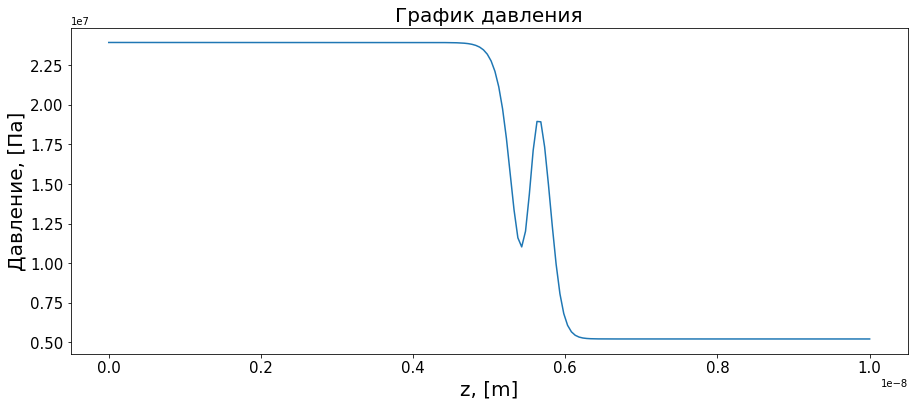

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(z,pres)
plt.title('График давления', size=20)
plt.xlabel('z, [m]', fontsize=20)
plt.ylabel('Давление, [Па]', size=20)
plt.tick_params(labelsize=15)
plt.savefig('pressure.png', bbox_inches='tight')
plt.show()

In [10]:
path_p = 'myData\\' + exp +  '\\p.txt'
p_data = np.loadtxt(path_p)

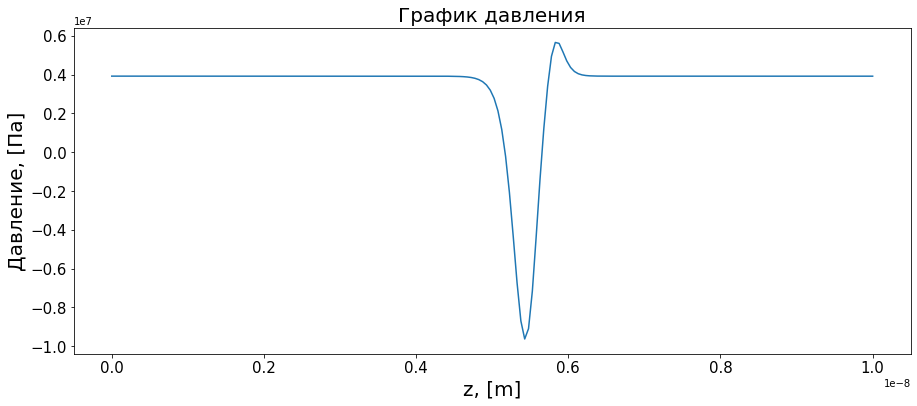

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(z,p_data)
plt.title('График давления', size=20)
plt.xlabel('z, [m]', fontsize=20)
plt.ylabel('Давление, [Па]', size=20)
plt.tick_params(labelsize=15)
plt.savefig('pressure.png', bbox_inches='tight')
plt.show()